In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("telecome data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#replacing blanks with 0 as tenure is 0 and no total charges are ecorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.duplicated().sum()

np.int64(0)

In [17]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [18]:
def convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

In [21]:
df.head(40)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


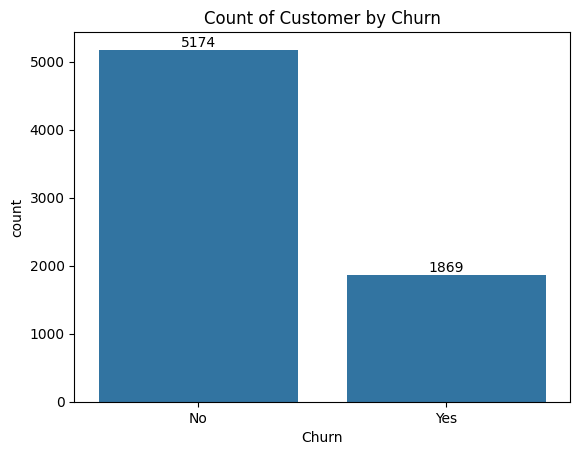

In [48]:
ax = sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [31]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb


,Churn
Churn,
No,5174
Yes,1869


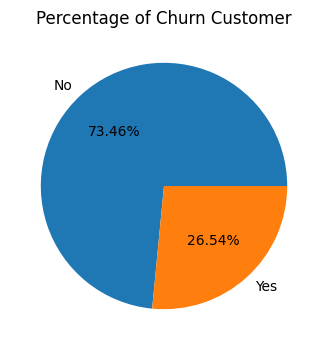

In [57]:
plt.figure(figsize = (4,4))

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")

plt.title("Percentage of Churn Customer")
plt.show()


# from given pie chart we can see that 26.5% customer has churned out

#now let's explore the reason behind it

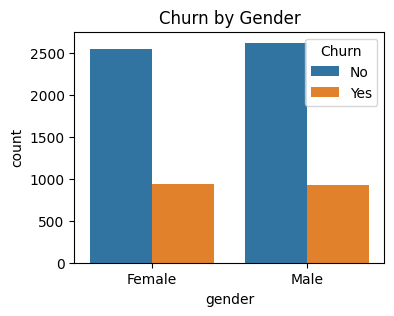

In [62]:
plt.figure(figsize = (4,3))
sns.countplot( x = df["gender"], hue = df["Churn"])
plt.title("Churn by Gender")
plt.show()

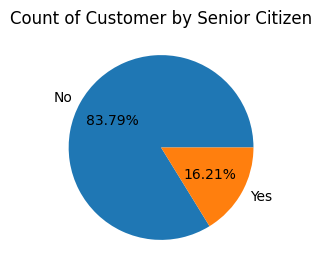

In [66]:
plt.figure(figsize = (4,3))
gd = df.groupby("SeniorCitizen").agg({'SeniorCitizen':"count"})
gd


plt.pie(gd["SeniorCitizen"],labels = gd.index, autopct =  "%1.2f%%")
plt.title("Count of Customer by Senior Citizen")
plt.show()

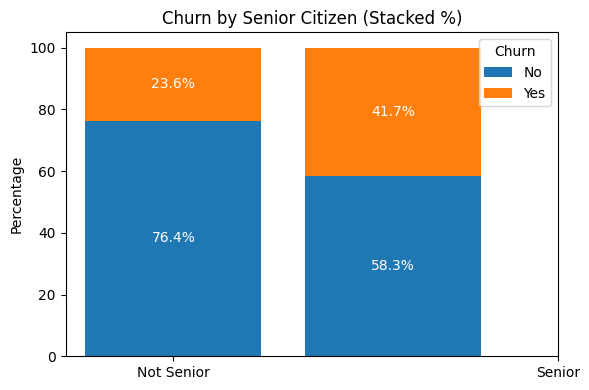

In [76]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
percentages = data.div(data.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

bottom = [0] * len(percentages)

for churn_value in percentages.columns:
    ax.bar(
        percentages.index,
        percentages[churn_value],
        bottom=bottom,
        label=churn_value
    )

    # Add percentage labels
    for i, (val, btm) in enumerate(zip(percentages[churn_value], bottom)):
        ax.text(i, btm + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=10)

    # Update bottom for next stack
    bottom = [btm + val for btm, val in zip(bottom, percentages[churn_value])]

# Labels and title
ax.set_xticks([0,1.75])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by Senior Citizen (Stacked %)')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

# comparatively a greater percentage of people in senior citizen category have churned

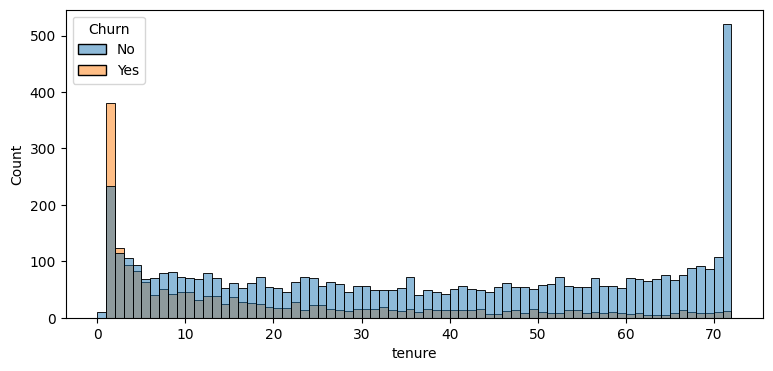

In [83]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df, hue = 'Churn', bins = 72)

plt.show()

# people who have used our services for a long period of time have stayed and people who have used our services for one or two months have likely churned 

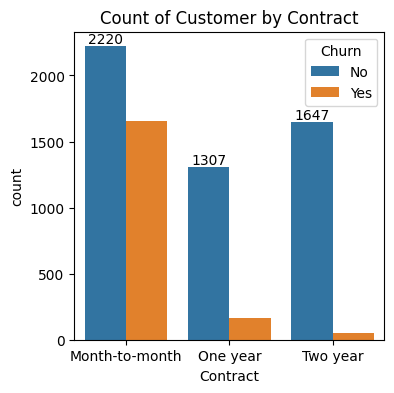

In [86]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='Contract', data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

# people who have month to month contract have likely to churned as compare to the people who have one or two year contarct

In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

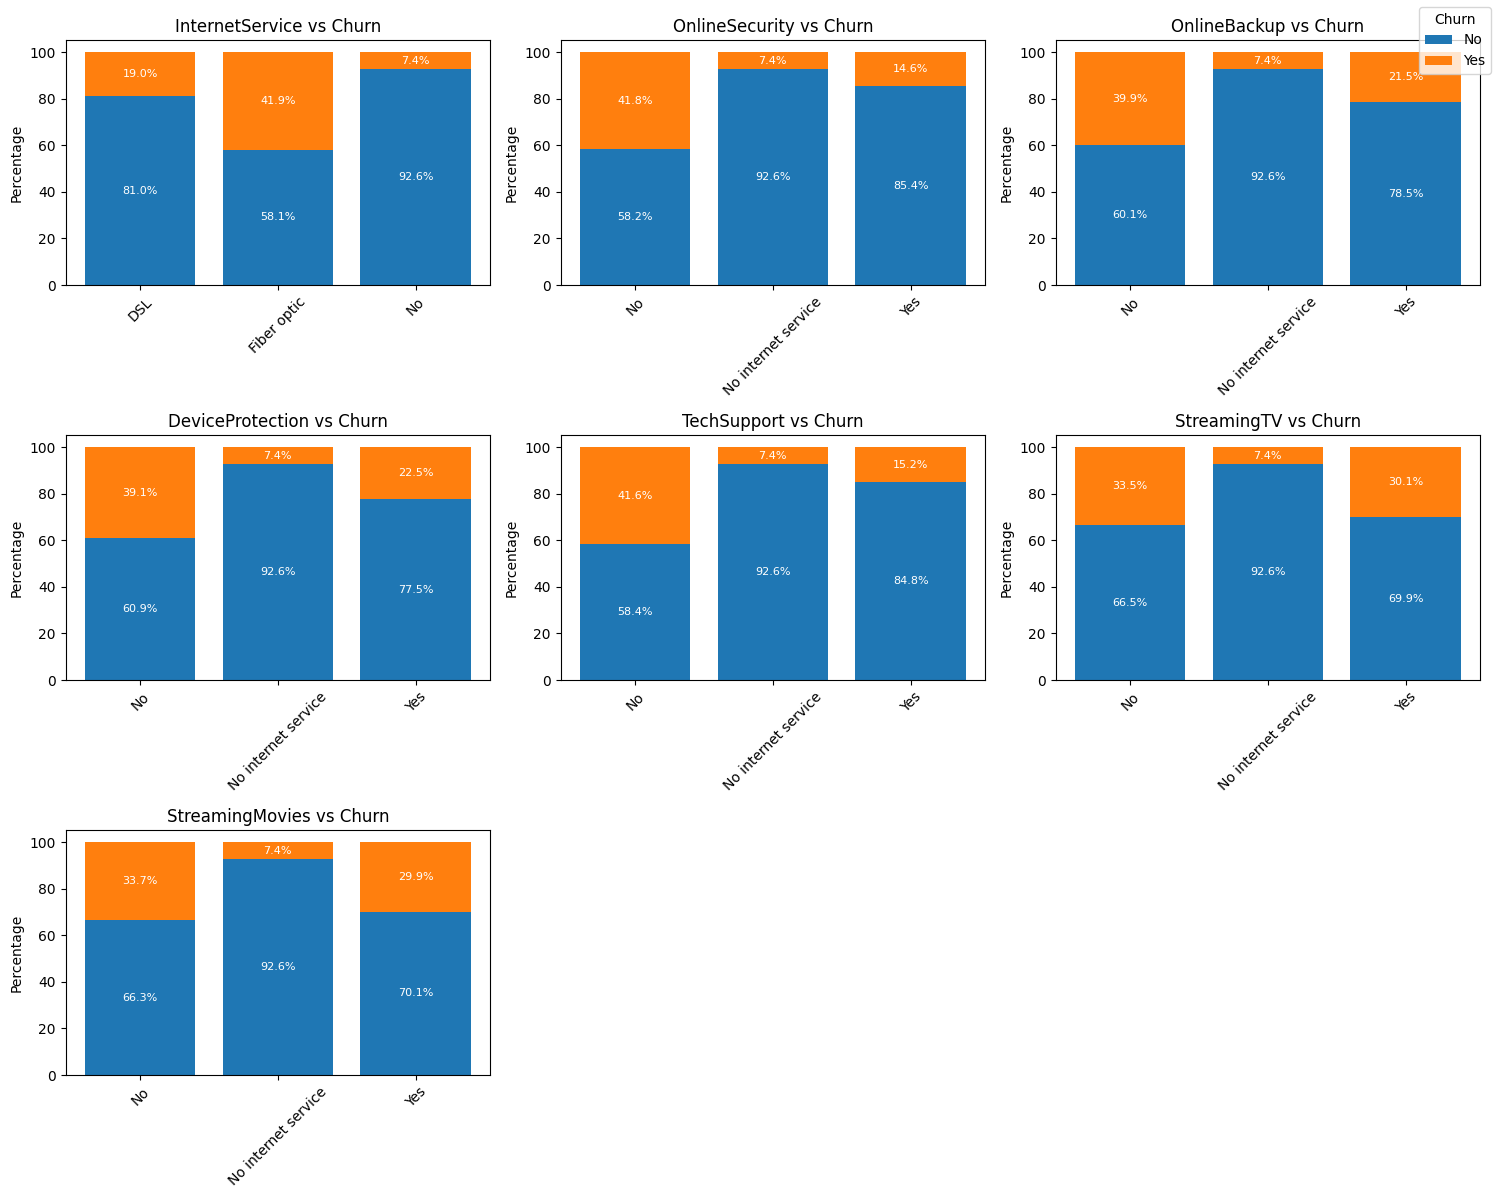

In [88]:


# List of features to plot
features = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid: 3 rows × 3 columns (you can adjust)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each feature
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Group and calculate percentages
    data = df.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    percentages = data.div(data.sum(axis=1), axis=0) * 100
    
    # Plot stacked bars
    bottom = [0] * len(percentages)
    for churn_val in percentages.columns:
        ax.bar(
            percentages.index,
            percentages[churn_val],
            bottom=bottom,
            label=churn_val
        )
        
        # Add percentage labels
        for j, (val, btm) in enumerate(zip(percentages[churn_val], bottom)):
            ax.text(j, btm + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=8, color='white')
        
        bottom = [btm + val for btm, val in zip(bottom, percentages[churn_val])]
    
    ax.set_title(f'{feature} vs Churn')
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(len(percentages.index)))
    ax.set_xticklabels(percentages.index, rotation=45)

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add legend and layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


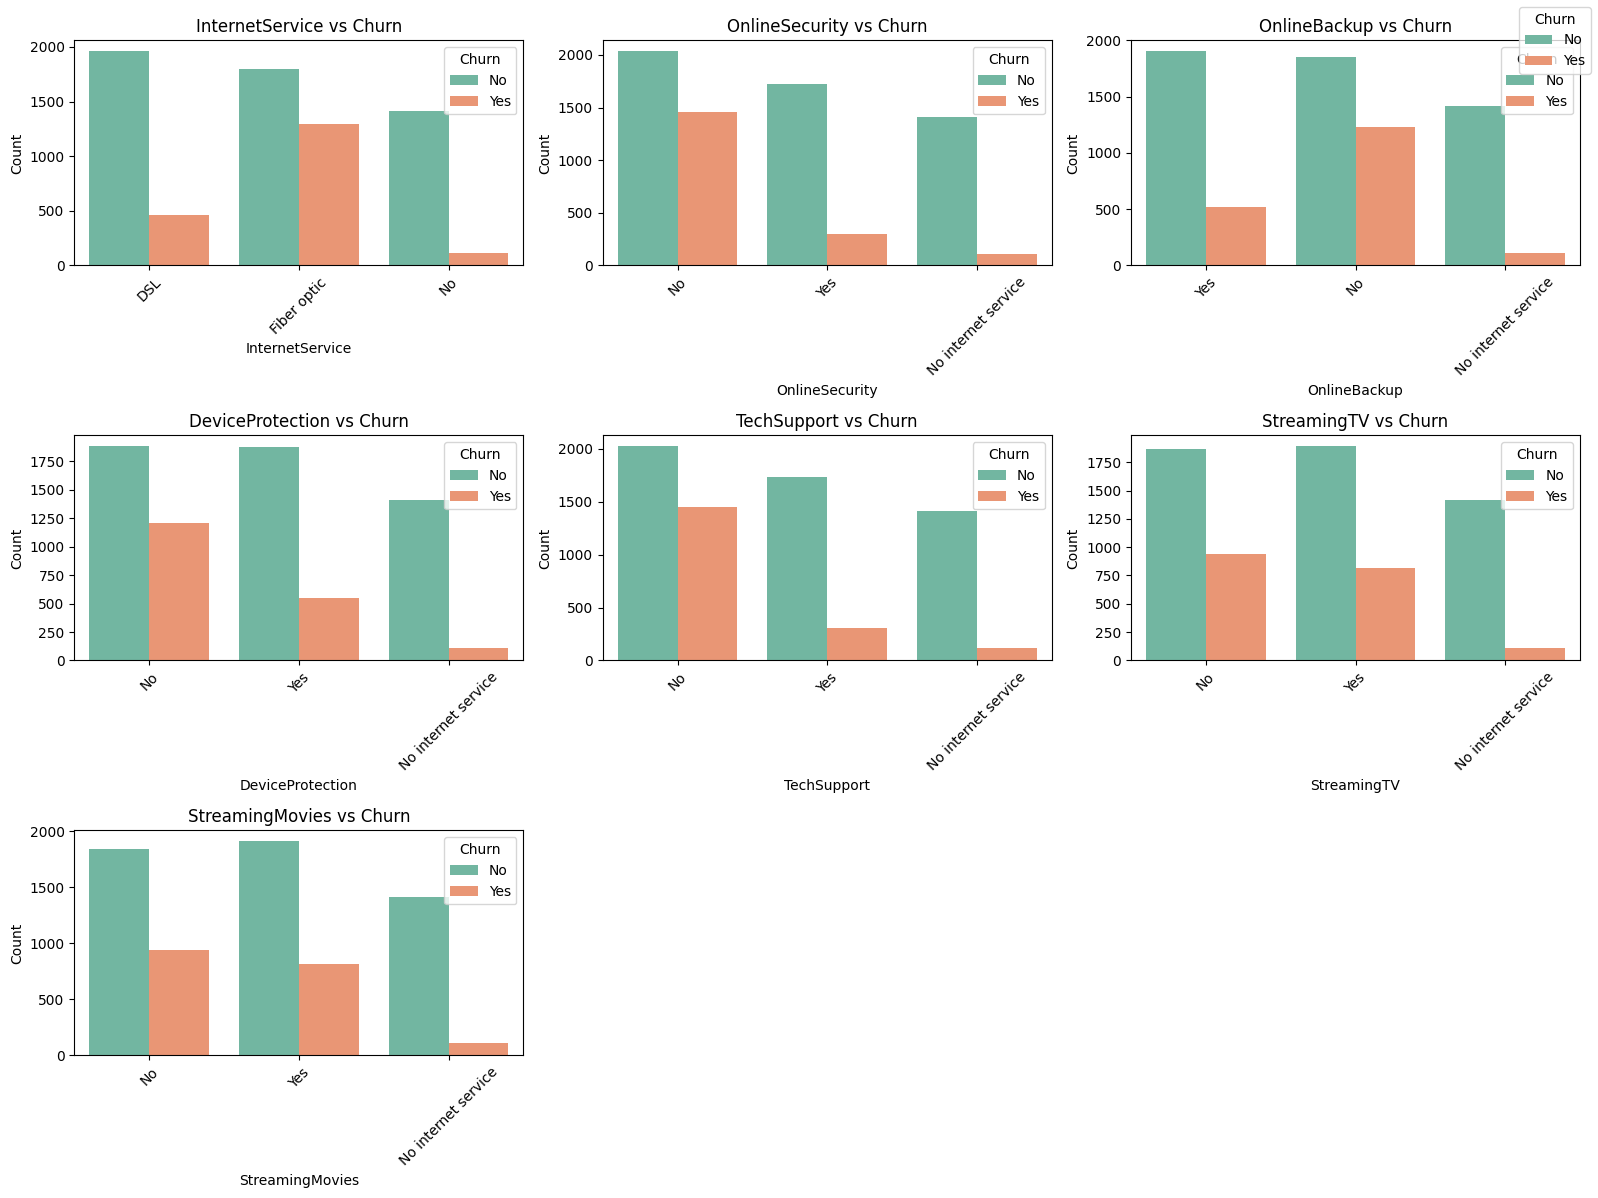

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
features = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Setup subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

# Loop through features and plot countplots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue='Churn', ax=ax, palette='Set2')
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have only 7 features but 9 slots)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Add legend and adjust layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


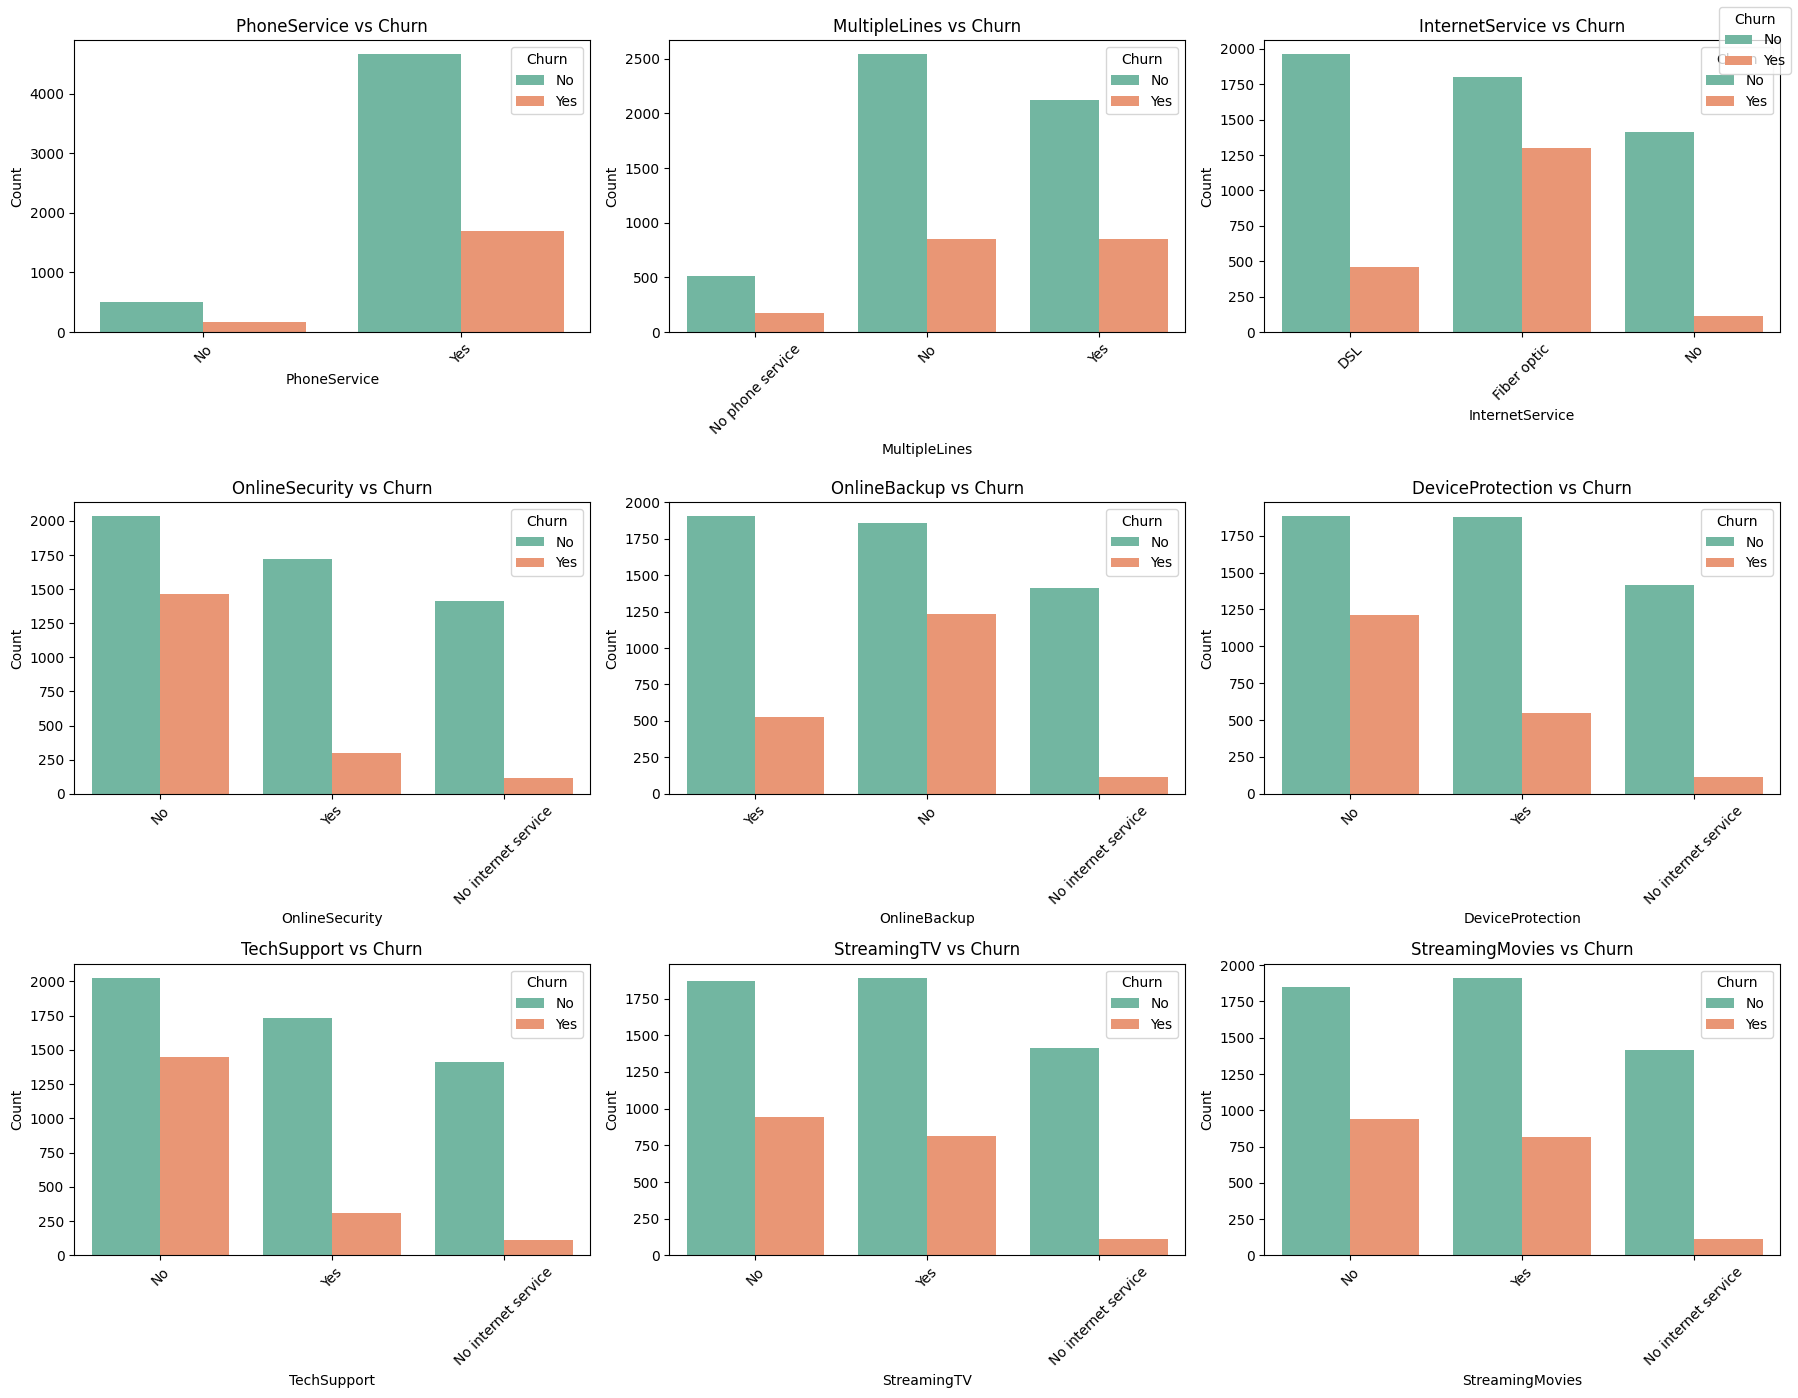

In [91]:


# List of features
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplot grid (3 rows × 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()

# Plot countplots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue='Churn', ax=ax, palette='Set2')
    ax.set_title(f'{feature} vs Churn', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Remove unused axes (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Add shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

# Layout adjustment
plt.tight_layout()
plt.show()


Customers without add-on services (like TechSupport, OnlineSecurity, etc.) churn more.

Streaming service users churn less, showing higher engagement.

Fiber optic users churn the most, DSL users the least.

Phone service helps reduce churn.

Overall, more services used = lower churn.

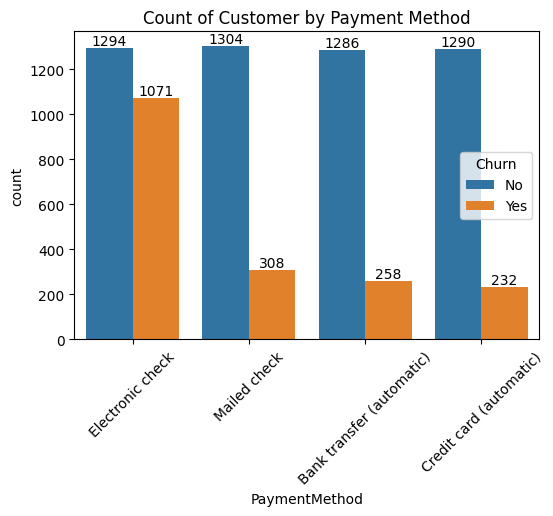

In [93]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='PaymentMethod', data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Electronic check users have the highest churn.

Automatic payments (bank transfer, credit card) have the lowest churn.

Mailed check users churn less than electronic check users but more than automatic methods.

Auto-pay methods reduce churn.
